In [1]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Assign values to variables
#All need to be changed is here

#Give DetectorID
DetectorID = '99_1'

#Different folder names
Folder1 = 'SameDay'
Folder2 = 'SameLane'

#Days of a week
w = 7
#Number of Lanes
l = 5

#For Plotting Type
#Limit for Flow - Occupancy
xlimit = 100
ylimit = 3000

#Limit for Speed - Flow
xlimit1 = 3000
ylimit1 = 90

#Limit for Speed - Occupancy
xlimit2 = 100
ylimit2 = 90

#Label for Flow - Occupancy
flowlabel = 'Flow [#vehicles/hour]'
occupancylabel = 'Occupancy'

#Label for Speed - Flow
speedlabel = 'Speed [miles/hour]'

#Color for plotting
colorpanel = ['k', 'b', 'g', 'c', 'y', 'r', 'm']
colorpanel2 = ['b', 'g', 'k', 'c', 'y', 'm', 'r'] #Create a second panel to for the style of same lane different days plot

#For file name of the plot
WeekTitle = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
WeekNum = ['1', '2', '3', '4', '5', '6', '7']
#LaneTitle = ['Void', '1', '2', '3', '4', '5'] #lane indicator b starts from 1

In [3]:
#Folder is for a category of plots
#Check if folder exists, if not, create the folder 
if not os.path.exists(Folder1):
    os.makedirs(Folder1)
if not os.path.exists(Folder2):
    os.makedirs(Folder2)

In [4]:
#Import data to DataFrame
df = pd.read_excel('DetectorData_%s.xlsx' %DetectorID)
df = df [(df['Poll_Count'] >= 13)]
print df.head()
print
#Number of Rows
print 'Number of Total Data:', len(df)
print 'Minimum of Poll_Count:', df.Poll_Count.min()

        DateTimeStamp  RoadwayID  SegmentID  Lane  Speed  Volume  Volume1  \
0 2014-11-01 00:09:23         99          1     1     71      91        0   
1 2014-11-01 00:09:23         99          1     2     67     190        1   
2 2014-11-01 00:09:23         99          1     3     70     237        1   
3 2014-11-01 00:09:23         99          1     4     68     307        1   
4 2014-11-01 00:09:23         99          1     5     62     247        3   

   Volume2  Volume3  Volume4  Volume5  Volume6  Occupancy  Poll_Count  Failure  
0       87        1        1        1        1          1          15        0  
1      171        5        0        7        3          4          15        0  
2      196       20        4        7        0          5          15        0  
3      209       24       11        7        1          9          15        0  
4      196        9        7        2        0          6          15        0  

Number of Total Data: 155264
Minimum of Poll_Count

In [5]:
# #Normalize Occupancy
# df['Occupancy_N'] = df['Occupancy'] * 15 / df['Poll_Count']
# print df[['Occupancy', 'Poll_Count', 'Occupancy_N']][0:10]
# print
# print 'Maximum of Normalized Occupancy:', df.Occupancy_N.max()
# print 'Mean of Normalized Occupancy:', df.Occupancy_N.mean()

In [6]:
#Calculate flow
df['Flow'] = df['Volume'] * (60 / 15)
#df['Flow_N'] = df['Flow'] * (15 / df['Poll_Count'])
print df[['Volume', 'Flow', 'Poll_Count']][0:10]
print
print 'Maximum of Flow:', df.Flow.max()
print 'Mean of Flow:', df.Flow.mean()

   Volume  Flow  Poll_Count
0      91   364          15
1     190   760          15
2     237   948          15
3     307  1228          15
4     247   988          15
5     143   572          16
6     276  1104          16
7     293  1172          16
8     396  1584          16
9     271  1084          16

Maximum of Flow: 3528
Mean of Flow: 984.546630256


In [7]:
#Get Day of Week
df['DayofWeek'] = df['DateTimeStamp'].dt.dayofweek
print df[['DateTimeStamp', 'DayofWeek']][0:1]
print df[['DateTimeStamp', 'DayofWeek']][500:501]

        DateTimeStamp  DayofWeek
0 2014-11-01 00:09:23          5
          DateTimeStamp  DayofWeek
513 2014-11-02 06:24:14          6


99_1_Lane1_1Monday_FO.jpg
99_1_Lane2_1Monday_FO.jpg
99_1_Lane3_1Monday_FO.jpg
99_1_Lane4_1Monday_FO.jpg
99_1_Lane5_1Monday_FO.jpg
99_1_Lane1_2Tuesday_FO.jpg
99_1_Lane2_2Tuesday_FO.jpg
99_1_Lane3_2Tuesday_FO.jpg
99_1_Lane4_2Tuesday_FO.jpg
99_1_Lane5_2Tuesday_FO.jpg
99_1_Lane1_3Wednesday_FO.jpg
99_1_Lane2_3Wednesday_FO.jpg
99_1_Lane3_3Wednesday_FO.jpg
99_1_Lane4_3Wednesday_FO.jpg
99_1_Lane5_3Wednesday_FO.jpg
99_1_Lane1_4Thursday_FO.jpg
99_1_Lane2_4Thursday_FO.jpg
99_1_Lane3_4Thursday_FO.jpg
99_1_Lane4_4Thursday_FO.jpg
99_1_Lane5_4Thursday_FO.jpg
99_1_Lane1_5Friday_FO.jpg
99_1_Lane2_5Friday_FO.jpg
99_1_Lane3_5Friday_FO.jpg
99_1_Lane4_5Friday_FO.jpg
99_1_Lane5_5Friday_FO.jpg
99_1_Lane1_6Saturday_FO.jpg
99_1_Lane2_6Saturday_FO.jpg
99_1_Lane3_6Saturday_FO.jpg
99_1_Lane4_6Saturday_FO.jpg
99_1_Lane5_6Saturday_FO.jpg
99_1_Lane1_7Sunday_FO.jpg
99_1_Lane2_7Sunday_FO.jpg
99_1_Lane3_7Sunday_FO.jpg
99_1_Lane4_7Sunday_FO.jpg
99_1_Lane5_7Sunday_FO.jpg


C:\Users\Jiheng\Anaconda\lib\site-packages\matplotlib\pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


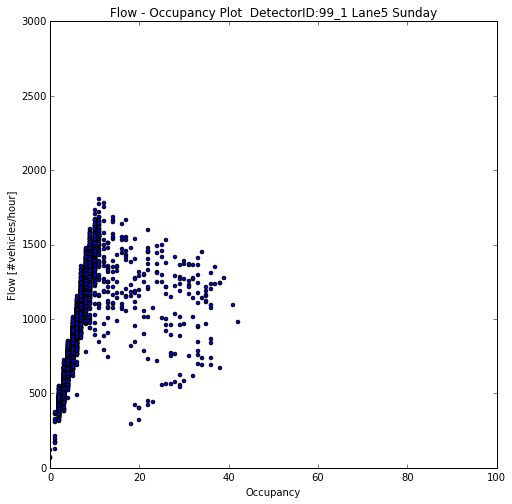

In [8]:
#Plot Type 1a: Flow - Occupancy
#Create loop for plotting

#Reset 
a = 0
b = 0

#a for day of week
for a in xrange(0, w):
    #b for lanes
    for b in xrange(1, l + 1):
        #Clear Background
        clf()
        plt.figure(figsize=(8,8))
        
        #x for occupancy 'Occupancy'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for flow 'Flow'
        y = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, s = 12)
        
        #Label
        plt.xlim(0, xlimit)
        plt.ylim(0, ylimit)
        plt.xlabel('%s' %occupancylabel)
        plt.ylabel('%s' %flowlabel)
        plt.title('Flow - Occupancy Plot  DetectorID:%s Lane%s %s' %(DetectorID, b, WeekTitle[a]))
        #for filename of the plot
        filename = '%s_Lane%s_%s%s_FO.jpg' %(DetectorID, b, WeekNum[a], WeekTitle[a])
        plt.savefig(filename)
        
        #Examine all filenames
        print filename

99_1_Lane1_1Monday_SF.jpg
99_1_Lane2_1Monday_SF.jpg
99_1_Lane3_1Monday_SF.jpg
99_1_Lane4_1Monday_SF.jpg
99_1_Lane5_1Monday_SF.jpg
99_1_Lane1_2Tuesday_SF.jpg
99_1_Lane2_2Tuesday_SF.jpg
99_1_Lane3_2Tuesday_SF.jpg
99_1_Lane4_2Tuesday_SF.jpg
99_1_Lane5_2Tuesday_SF.jpg
99_1_Lane1_3Wednesday_SF.jpg
99_1_Lane2_3Wednesday_SF.jpg
99_1_Lane3_3Wednesday_SF.jpg
99_1_Lane4_3Wednesday_SF.jpg
99_1_Lane5_3Wednesday_SF.jpg
99_1_Lane1_4Thursday_SF.jpg
99_1_Lane2_4Thursday_SF.jpg
99_1_Lane3_4Thursday_SF.jpg
99_1_Lane4_4Thursday_SF.jpg
99_1_Lane5_4Thursday_SF.jpg
99_1_Lane1_5Friday_SF.jpg
99_1_Lane2_5Friday_SF.jpg
99_1_Lane3_5Friday_SF.jpg
99_1_Lane4_5Friday_SF.jpg
99_1_Lane5_5Friday_SF.jpg
99_1_Lane1_6Saturday_SF.jpg
99_1_Lane2_6Saturday_SF.jpg
99_1_Lane3_6Saturday_SF.jpg
99_1_Lane4_6Saturday_SF.jpg
99_1_Lane5_6Saturday_SF.jpg
99_1_Lane1_7Sunday_SF.jpg
99_1_Lane2_7Sunday_SF.jpg
99_1_Lane3_7Sunday_SF.jpg
99_1_Lane4_7Sunday_SF.jpg
99_1_Lane5_7Sunday_SF.jpg


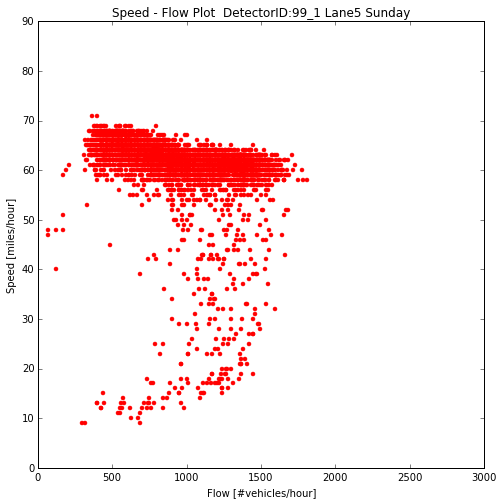

In [9]:
#Plot Type 1b: Speed - Flow
#Create loop for plotting

#Reset 
a = 0
b = 0

#a for day of week
for a in xrange(0, w):
    #b for lanes
    for b in xrange(1, l + 1):
        #Clear Background
        clf()
        plt.figure(figsize=(8,8))
        
        #x for flow 'Flow'
        x = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, color = 'r', s = 12)
        
        #Label
        plt.xlim(0, xlimit1)
        plt.ylim(0, ylimit1)
        plt.xlabel('%s' %flowlabel)
        plt.ylabel('%s' %speedlabel)
        plt.title('Speed - Flow Plot  DetectorID:%s Lane%s %s' %(DetectorID, b, WeekTitle[a]))
        #for filename of the plot
        filename = '%s_Lane%s_%s%s_SF.jpg' %(DetectorID, b, WeekNum[a], WeekTitle[a])
        plt.savefig(filename)
        
        #Examine all filenames
        print filename

99_1_Lane1_1Monday_SO.jpg
99_1_Lane2_1Monday_SO.jpg
99_1_Lane3_1Monday_SO.jpg
99_1_Lane4_1Monday_SO.jpg
99_1_Lane5_1Monday_SO.jpg
99_1_Lane1_2Tuesday_SO.jpg
99_1_Lane2_2Tuesday_SO.jpg
99_1_Lane3_2Tuesday_SO.jpg
99_1_Lane4_2Tuesday_SO.jpg
99_1_Lane5_2Tuesday_SO.jpg
99_1_Lane1_3Wednesday_SO.jpg
99_1_Lane2_3Wednesday_SO.jpg
99_1_Lane3_3Wednesday_SO.jpg
99_1_Lane4_3Wednesday_SO.jpg
99_1_Lane5_3Wednesday_SO.jpg
99_1_Lane1_4Thursday_SO.jpg
99_1_Lane2_4Thursday_SO.jpg
99_1_Lane3_4Thursday_SO.jpg
99_1_Lane4_4Thursday_SO.jpg
99_1_Lane5_4Thursday_SO.jpg
99_1_Lane1_5Friday_SO.jpg
99_1_Lane2_5Friday_SO.jpg
99_1_Lane3_5Friday_SO.jpg
99_1_Lane4_5Friday_SO.jpg
99_1_Lane5_5Friday_SO.jpg
99_1_Lane1_6Saturday_SO.jpg
99_1_Lane2_6Saturday_SO.jpg
99_1_Lane3_6Saturday_SO.jpg
99_1_Lane4_6Saturday_SO.jpg
99_1_Lane5_6Saturday_SO.jpg
99_1_Lane1_7Sunday_SO.jpg
99_1_Lane2_7Sunday_SO.jpg
99_1_Lane3_7Sunday_SO.jpg
99_1_Lane4_7Sunday_SO.jpg
99_1_Lane5_7Sunday_SO.jpg


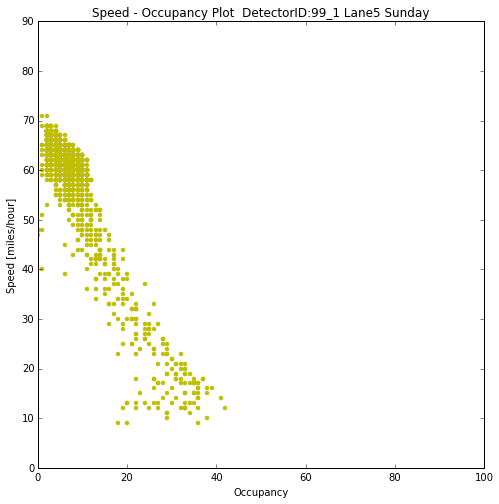

In [10]:
#Plot Type 1c: Speed - Occupancy
#Create loop for plotting

#Reset 
a = 0
b = 0

#a for day of week
for a in xrange(0, w):
    #b for lanes
    for b in xrange(1, l + 1):
        #Clear Background
        clf()
        plt.figure(figsize=(8,8))
        
        #x for flow 'Flow'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, color = 'y', s = 12)
        
        #Label
        plt.xlim(0, xlimit2)
        plt.ylim(0, ylimit2)
        plt.xlabel('%s' %occupancylabel)
        plt.ylabel('%s' %speedlabel)
        plt.title('Speed - Occupancy Plot  DetectorID:%s Lane%s %s' %(DetectorID, b, WeekTitle[a]))
        #for filename of the plot
        filename = '%s_Lane%s_%s%s_SO.jpg' %(DetectorID, b, WeekNum[a], WeekTitle[a])
        plt.savefig(filename)
        
        #Examine all filenames
        print filename

SameDay/99_1_1Monday_FO.jpg
SameDay/99_1_2Tuesday_FO.jpg
SameDay/99_1_3Wednesday_FO.jpg
SameDay/99_1_4Thursday_FO.jpg
SameDay/99_1_5Friday_FO.jpg
SameDay/99_1_6Saturday_FO.jpg
SameDay/99_1_7Sunday_FO.jpg


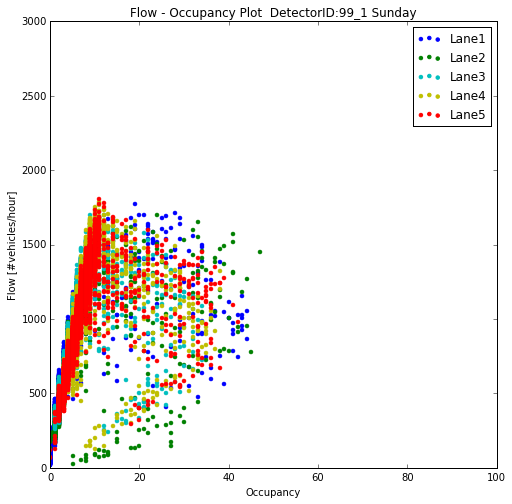

In [11]:
#Plot Type 2a: Flow - Occupancy Same Day Different Lanes
#Create loop for plotting

#Reset
a = 0 
b = 0 

#a for day of week
for a in xrange(0, w):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #b for lanes
    for b in xrange(1, l + 1):  
        #x for occupancy 'Occupancy'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for flow 'Flow'
        y = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, color = colorpanel[b], label = 'Lane%s' % b, s = 12)
        
    #Label
    plt.xlim(0,xlimit)
    plt.ylim(0,ylimit)
    plt.xlabel('%s' %occupancylabel)
    plt.ylabel('%s' %flowlabel)
    plt.title('Flow - Occupancy Plot  DetectorID:%s %s' %(DetectorID, WeekTitle[a]))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_%s%s_FO.jpg' %(Folder1, DetectorID, WeekNum[a], WeekTitle[a])
    plt.savefig(filename)
        
    #Examine all filenames
    print filename

SameDay/99_1_1Monday_SF.jpg
SameDay/99_1_2Tuesday_SF.jpg
SameDay/99_1_3Wednesday_SF.jpg
SameDay/99_1_4Thursday_SF.jpg
SameDay/99_1_5Friday_SF.jpg
SameDay/99_1_6Saturday_SF.jpg
SameDay/99_1_7Sunday_SF.jpg


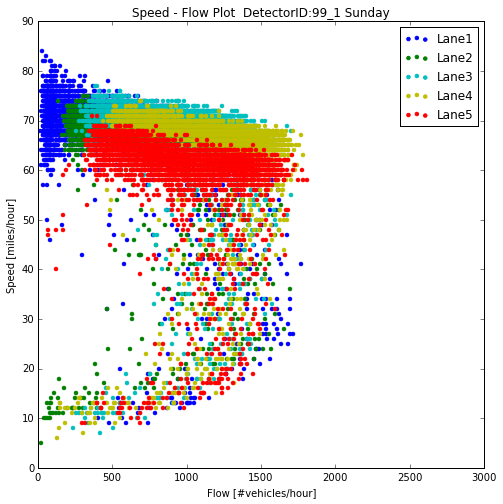

In [12]:
#Plot Type 2b: Speed - Flow Same Day Different Lanes
#Create loop for plotting

#Reset
a = 0 
b = 0 

#a for day of week
for a in xrange(0, w):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #b for lanes
    for b in xrange(1, l + 1):  
        #x for flow 'Flow'
        x = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, color = colorpanel[b], label = 'Lane%s' % b, s = 12)
        
    #Label
    plt.xlim(0, xlimit1)
    plt.ylim(0, ylimit1)
    plt.xlabel('%s' %flowlabel)
    plt.ylabel('%s' %speedlabel)
    plt.title('Speed - Flow Plot  DetectorID:%s %s' %(DetectorID, WeekTitle[a]))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_%s%s_SF.jpg' %(Folder1, DetectorID, WeekNum[a], WeekTitle[a])
    plt.savefig(filename)
        
    #Examine all filenames
    print filename

SameDay/99_1_1Monday_SO.jpg
SameDay/99_1_2Tuesday_SO.jpg
SameDay/99_1_3Wednesday_SO.jpg
SameDay/99_1_4Thursday_SO.jpg
SameDay/99_1_5Friday_SO.jpg
SameDay/99_1_6Saturday_SO.jpg
SameDay/99_1_7Sunday_SO.jpg


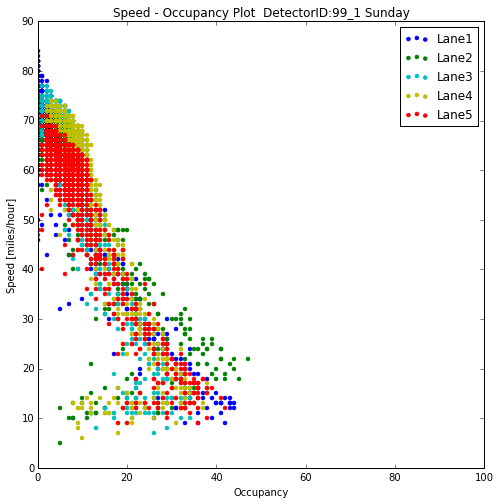

In [13]:
#Plot Type 2c: Speed - Occupancy Same Day Different Lanes
#Create loop for plotting

#Reset
a = 0 
b = 0 

#a for day of week
for a in xrange(0, w):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #b for lanes
    for b in xrange(1, l + 1):  
        #x for occupancy 'Occupancy'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        plt.scatter(x, y, color = colorpanel[b], label = 'Lane%s' % b, s = 12)
        
    #Label
    plt.xlim(0, xlimit2)
    plt.ylim(0, ylimit2)
    plt.xlabel('%s' %occupancylabel)
    plt.ylabel('%s' %speedlabel)
    plt.title('Speed - Occupancy Plot  DetectorID:%s %s' %(DetectorID, WeekTitle[a]))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_%s%s_SO.jpg' %(Folder1, DetectorID, WeekNum[a], WeekTitle[a])
    plt.savefig(filename)
        
    #Examine all filenames
    print filename

SameLane/99_1_Lane1_FO.jpg
SameLane/99_1_Lane2_FO.jpg
SameLane/99_1_Lane3_FO.jpg
SameLane/99_1_Lane4_FO.jpg
SameLane/99_1_Lane5_FO.jpg


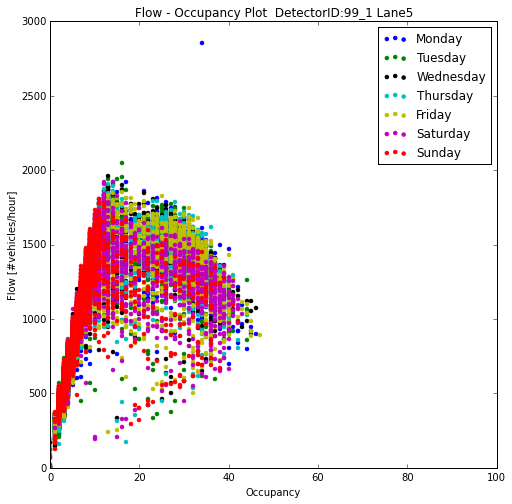

In [14]:
#Plot Type 3a: Flow - Occupancy Same Lane Different days
#Create loop for plotting

#Reset
a = 0 
b = 0 

#b for lanes
for b in xrange(1, l + 1):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #a for day of week
    for a in xrange(0, w):  
        #x for occupancy 'Occupancy'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for flow 'Flow'
        y = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        #Use the second color panel 
        plt.scatter(x, y, color = colorpanel2[a], label = '%s' % WeekTitle[a], s = 12)
        
    #Label
    plt.xlim(0,xlimit)
    plt.ylim(0,ylimit)
    plt.xlabel('%s' %occupancylabel)
    plt.ylabel('%s' %flowlabel)
    plt.title('Flow - Occupancy Plot  DetectorID:%s Lane%s' %(DetectorID, b))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_Lane%s_FO.jpg' %(Folder2, DetectorID, b)
    plt.savefig(filename)
        
    #Examine all filenames
    print filename

SameLane/99_1_Lane1_SF.jpg
SameLane/99_1_Lane2_SF.jpg
SameLane/99_1_Lane3_SF.jpg
SameLane/99_1_Lane4_SF.jpg
SameLane/99_1_Lane5_SF.jpg


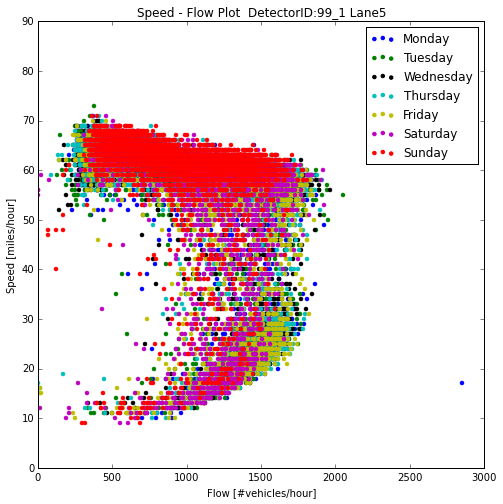

In [15]:
#Plot Type 3b: Speed - Flow Same Lane Different days
#Create loop for plotting

#Reset
a = 0 
b = 0 

#b for lanes
for b in xrange(1, l + 1):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #a for day of week
    for a in xrange(0, w):  
        #x for flow 'Flow'
        x = df['Flow'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        #Use the second color panel 
        plt.scatter(x, y, color = colorpanel2[a], label = '%s' % WeekTitle[a], s = 12)
        
    #Label
    plt.xlim(0, xlimit1)
    plt.ylim(0, ylimit1)
    plt.xlabel('%s' %flowlabel)
    plt.ylabel('%s' %speedlabel)
    plt.title('Speed - Flow Plot  DetectorID:%s Lane%s' %(DetectorID, b))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_Lane%s_SF.jpg' %(Folder2, DetectorID, b)
    plt.savefig(filename)
        
    #Examine all filenames
    print filename

SameLane/99_1_Lane1_SO.jpg
SameLane/99_1_Lane2_SO.jpg
SameLane/99_1_Lane3_SO.jpg
SameLane/99_1_Lane4_SO.jpg
SameLane/99_1_Lane5_SO.jpg


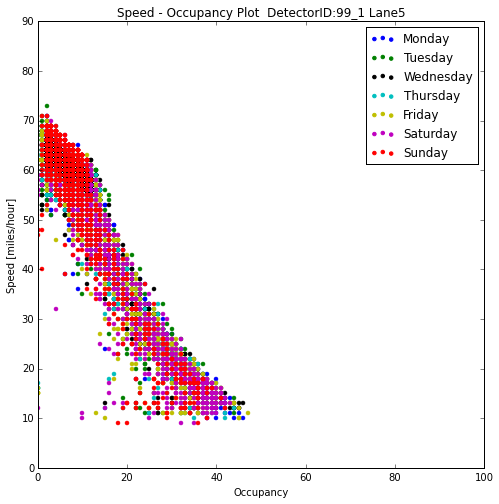

In [16]:
#Plot Type 3c: Speed - Occupancy Same Lane Different days
#Create loop for plotting

#Reset
a = 0 
b = 0 

#b for lanes
for b in xrange(1, l + 1):
    #Clear Background
    clf()
    plt.figure(figsize=(8,8))
    
    #a for day of week
    for a in xrange(0, w):  
        #x for occupancy 'Occupancy'
        x = df['Occupancy'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        #y for speed 'Speed'
        y = df['Speed'][(df['DayofWeek'] == a) & (df['Lane'] == b)]
        
        #Scatter Plot
        #Use the second color panel 
        plt.scatter(x, y, color = colorpanel2[a], label = '%s' % WeekTitle[a], s = 12)
        
    #Label
    plt.xlim(0, xlimit2)
    plt.ylim(0, ylimit2)
    plt.xlabel('%s' %occupancylabel)
    plt.ylabel('%s' %speedlabel)
    plt.title('Speed - Occupancy Plot  DetectorID:%s Lane%s' %(DetectorID, b))
    plt.legend(loc='upper right')
    #for filename of the plot
    filename = '%s/%s_Lane%s_SO.jpg' %(Folder2, DetectorID, b)
    plt.savefig(filename)
        
    #Examine all filenames
    print filename